In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def open_sed(filename, filetype, dimX, dimY, dimZ):
    fd = open(filename, 'rb')
    if filetype == 'raw':
        f = np.fromfile(fd, dtype=np.uint8,count=dimX*dimY*dimZ)
    elif filetype == 'sed' or filetype == 'sumsed':
        f = np.fromfile(fd, dtype=np.float64,count=dimX*dimY*dimZ)
    im = f.reshape((dimZ, dimY, dimX))   
    fd.close()

    slice = im[1,:,:]
    print(slice[:,:])
    
    return slice

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 127]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]
 [1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]
 [1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.17660342e-47]
 ...
 [1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]
 [1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]
 [1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]]
[[1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]
 [1.39804329e-76 1.39804329e-76 1.39804329e-76 ... 1.39804329e-76
  1.39804329e-76 1.39804329e-76]
 [1.398043

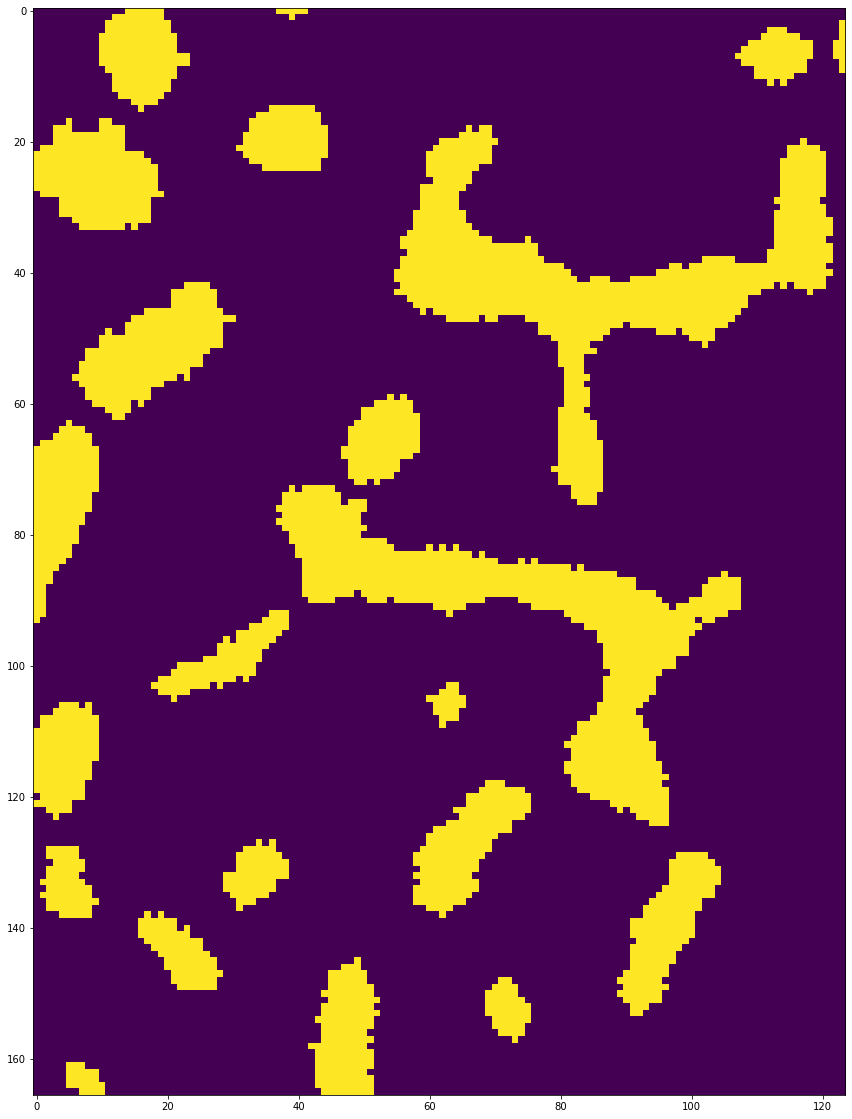

In [12]:
file = 'E0015896_ITS_L_2.raw'
im_slice = open_sed(file,'raw',124,166,74)

file_sed = 'E0015896_ITS_L_2.sed'
im_sed = open_sed(file_sed,'sed',124,166,74)

file_sumsed = 'E0015896_ITS_L_2.sumsed'
im_sumsed = open_sed(file_sumsed,'sumsed',124,166,74)

plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(im_slice[:,:])

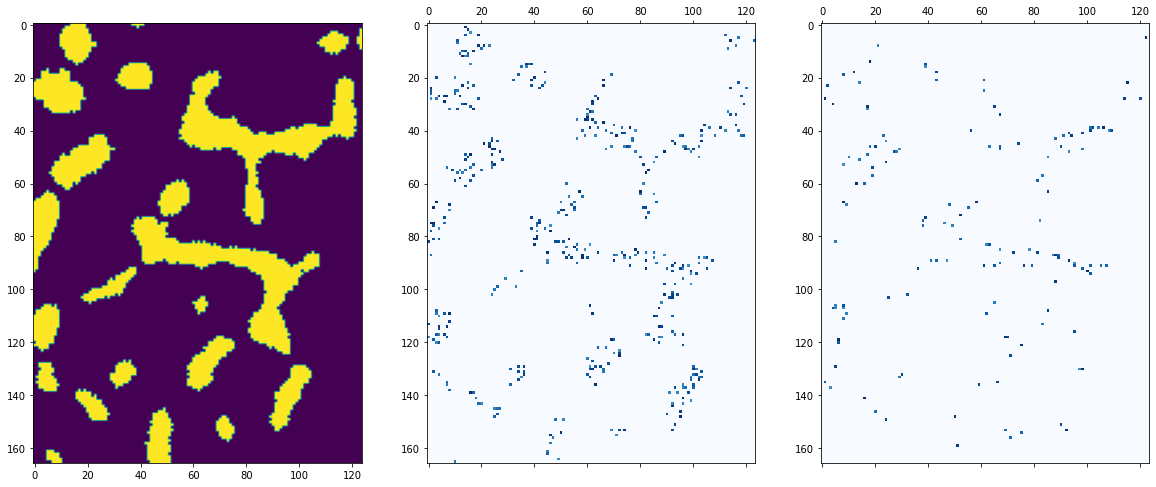

In [14]:
# plot colormap of SED value for slice above
fig, (ax0,ax1,ax2) = plt.subplots(1,3)

ax0.imshow(im_slice[:,:])
#ax0.colorbar()

ax1.matshow(im_sed, cmap=plt.cm.Blues)
#fig.colorbar()

ax2.matshow(im_sumsed[:,:], cmap=plt.cm.Blues)

#for i in range(dimX):
#    for j in range(dimY):
#        c = im2d_sed[j,i]
#        ax.text(i,j,str(c),va='center',ha='center')


(array([[163.,   0.,   0., ...,   0.,   2.,   0.],
        [159.,   0.,   0., ...,   1.,   3.,   2.],
        [160.,   0.,   0., ...,   0.,   4.,   2.],
        ...,
        [166.,   0.,   0., ...,   0.,   0.,   0.],
        [166.,   0.,   0., ...,   0.,   0.,   0.],
        [165.,   0.,   0., ...,   1.,   0.,   0.]]),
 array([1.39804329e-76, 4.85786909e-34, 9.71573818e-34, 1.45736073e-33,
        1.94314764e-33, 2.42893455e-33, 2.91472145e-33, 3.40050836e-33,
        3.88629527e-33, 4.37208218e-33, 4.85786909e-33]),
 <a list of 124 BarContainer objects>)

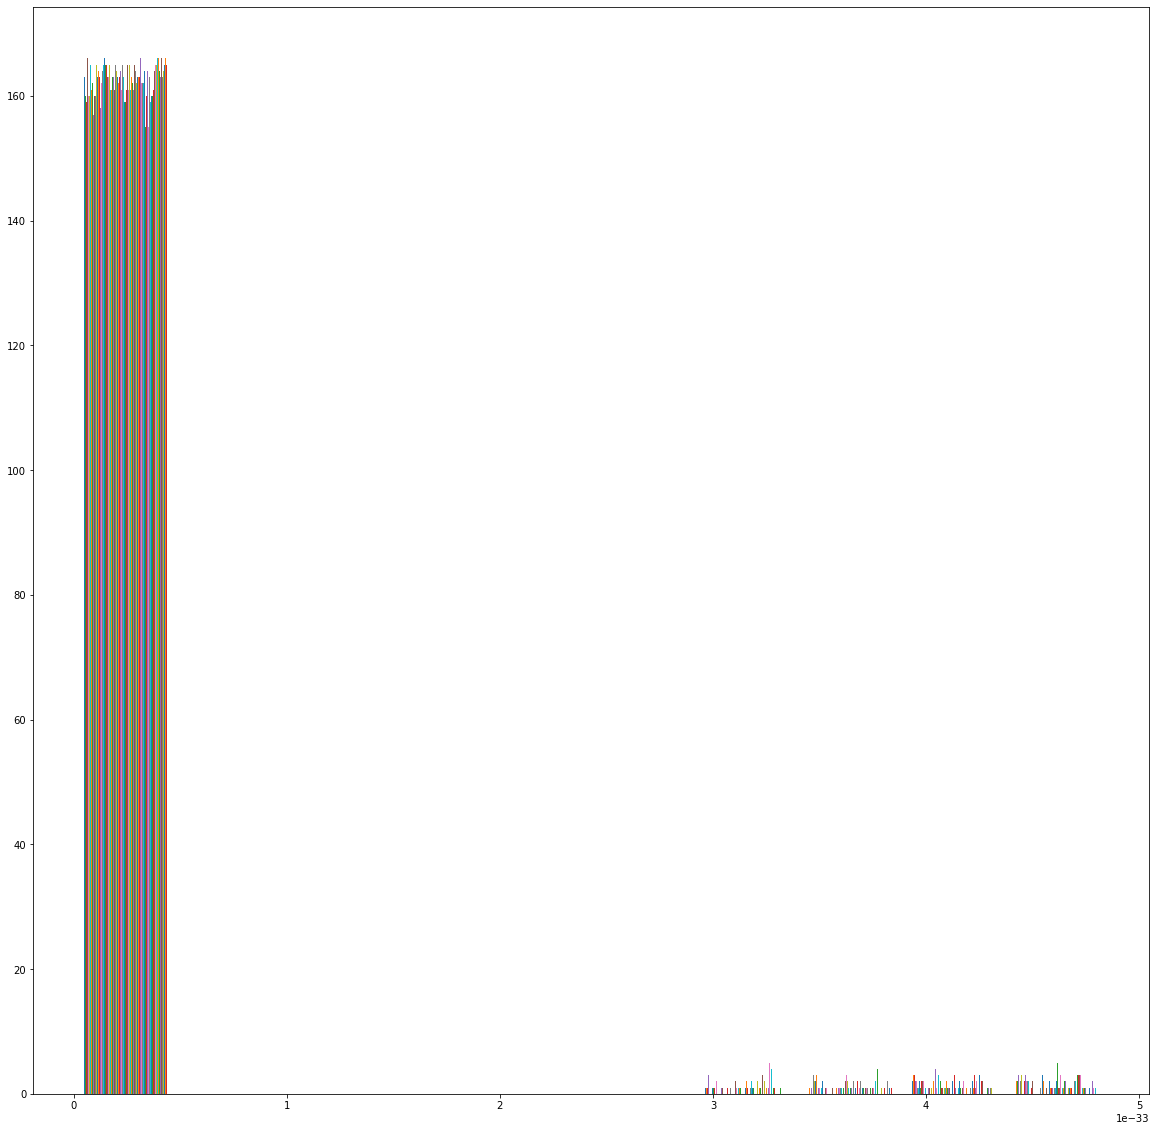

In [15]:
plt.hist(im_sed)

(array([[166.,   0.,   0., ...,   0.,   0.,   0.],
        [164.,   0.,   0., ...,   0.,   1.,   1.],
        [165.,   0.,   0., ...,   0.,   1.,   0.],
        ...,
        [166.,   0.,   0., ...,   0.,   0.,   0.],
        [165.,   0.,   0., ...,   0.,   0.,   1.],
        [166.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([1.39804329e-76, 4.85786612e-34, 9.71573223e-34, 1.45735984e-33,
        1.94314645e-33, 2.42893306e-33, 2.91471967e-33, 3.40050628e-33,
        3.88629289e-33, 4.37207951e-33, 4.85786612e-33]),
 <a list of 124 BarContainer objects>)

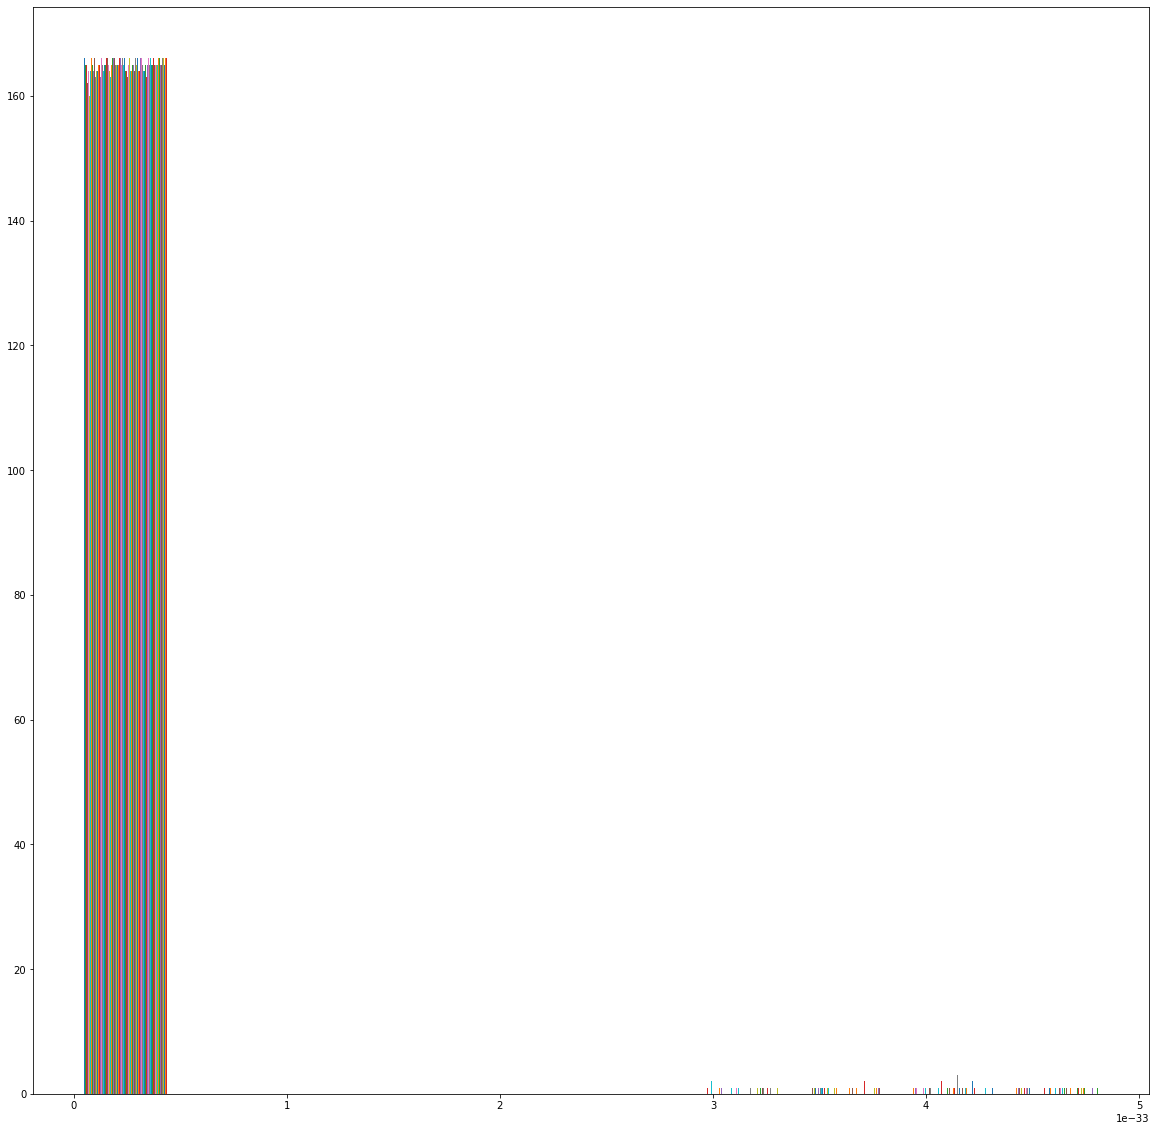

In [16]:
plt.hist(im_sumsed)